In [2]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import warnings
warnings.simplefilter('ignore')

In [ ]:
data= load_boston()
print(data.DESCR)

In [98]:
predictors = data.feature_names # not that it does not include the target, 'MEDV'
predictors

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [100]:
boston = pd.DataFrame(data=data.data, columns=predictors) #without the target
np.round(boston.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [101]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Plot the data!

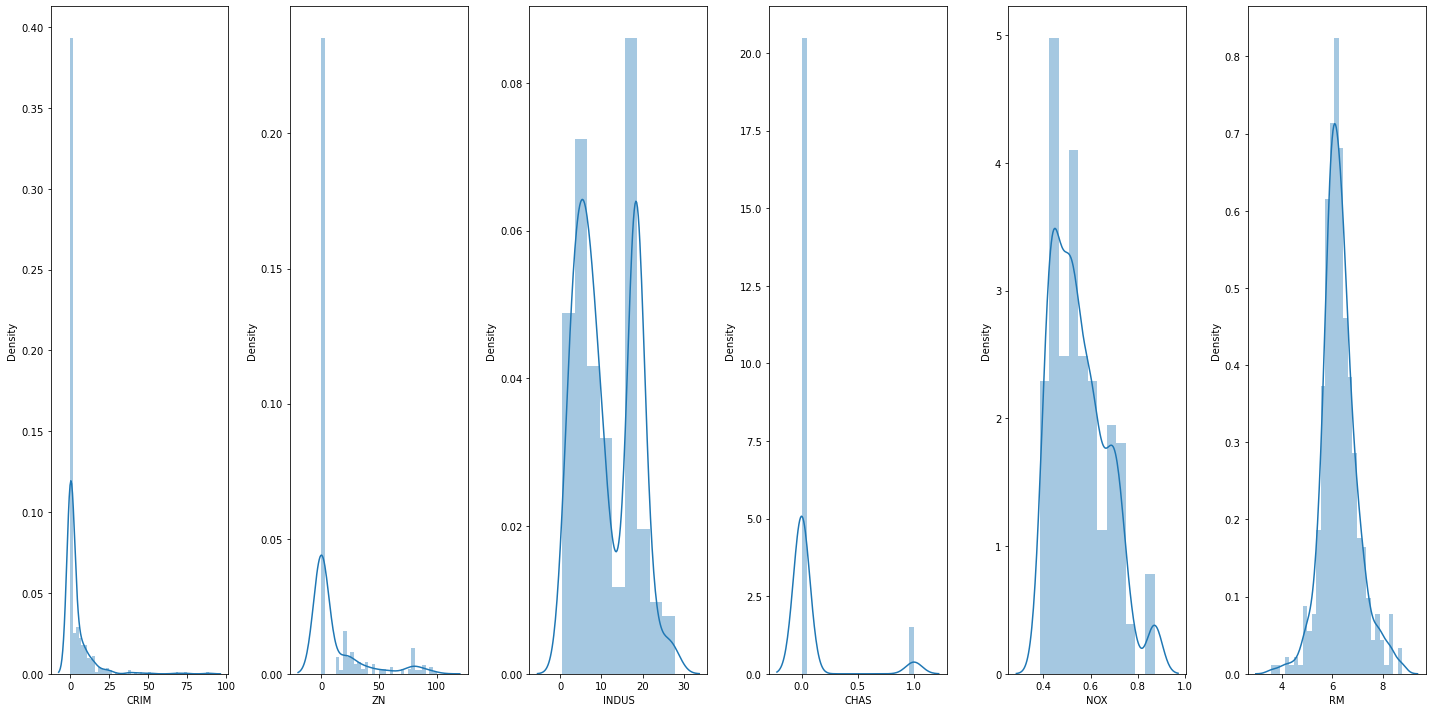

In [103]:
_, axes = plt.subplots(1, len(predictors)//2 , figsize=(20,10))
for i, predictor in enumerate(predictors[:len(predictors)//2]):
    sns.distplot(boston[predictor], ax=axes[i])
plt.tight_layout()

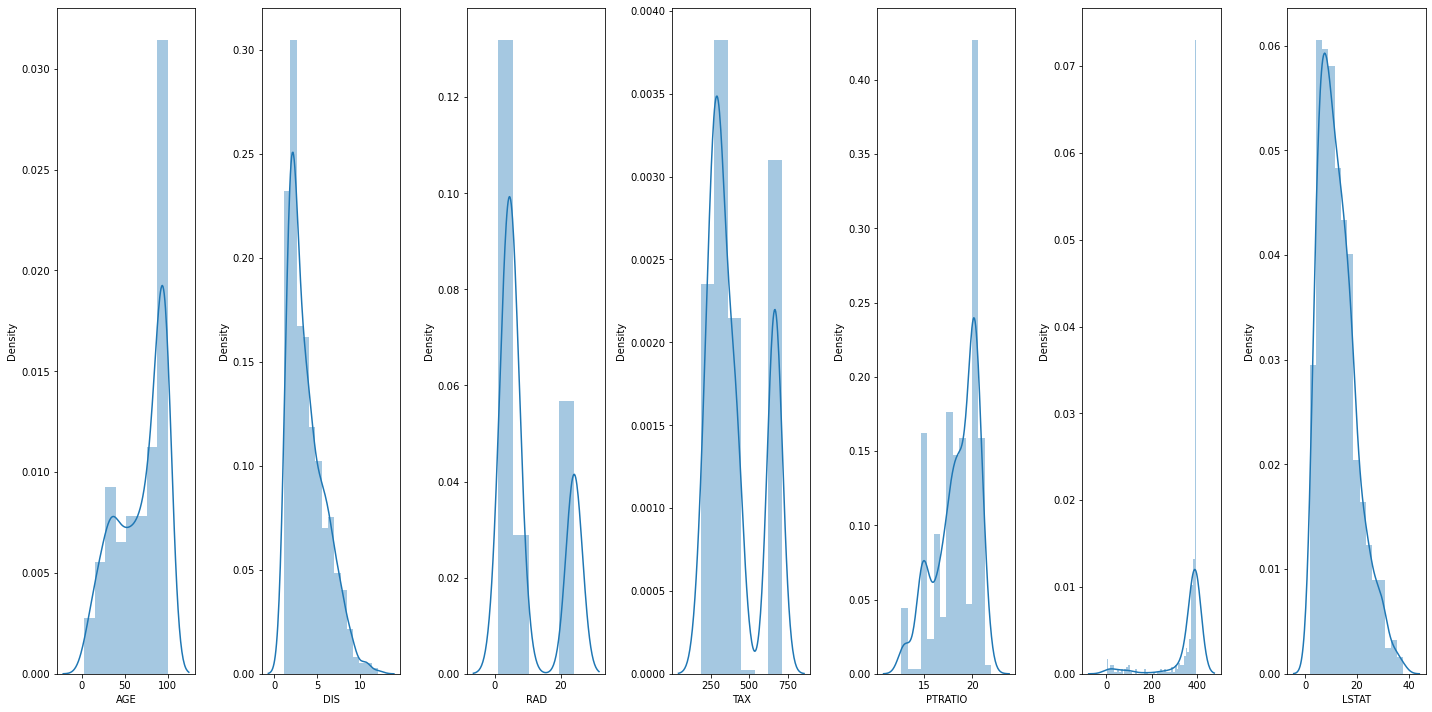

In [104]:
_, axes = plt.subplots(1, len(predictors)//2+1 , figsize=(20,10))
for i, predictor in enumerate(predictors[len(predictors)//2:]):
    sns.distplot(boston[predictor], ax=axes[i])
plt.tight_layout()

### So we can see that CHAS is a categorical variable. We must take that into account in our model.

Let's investigate the scale of the different predictors to see if it is worth centering/normalizing it



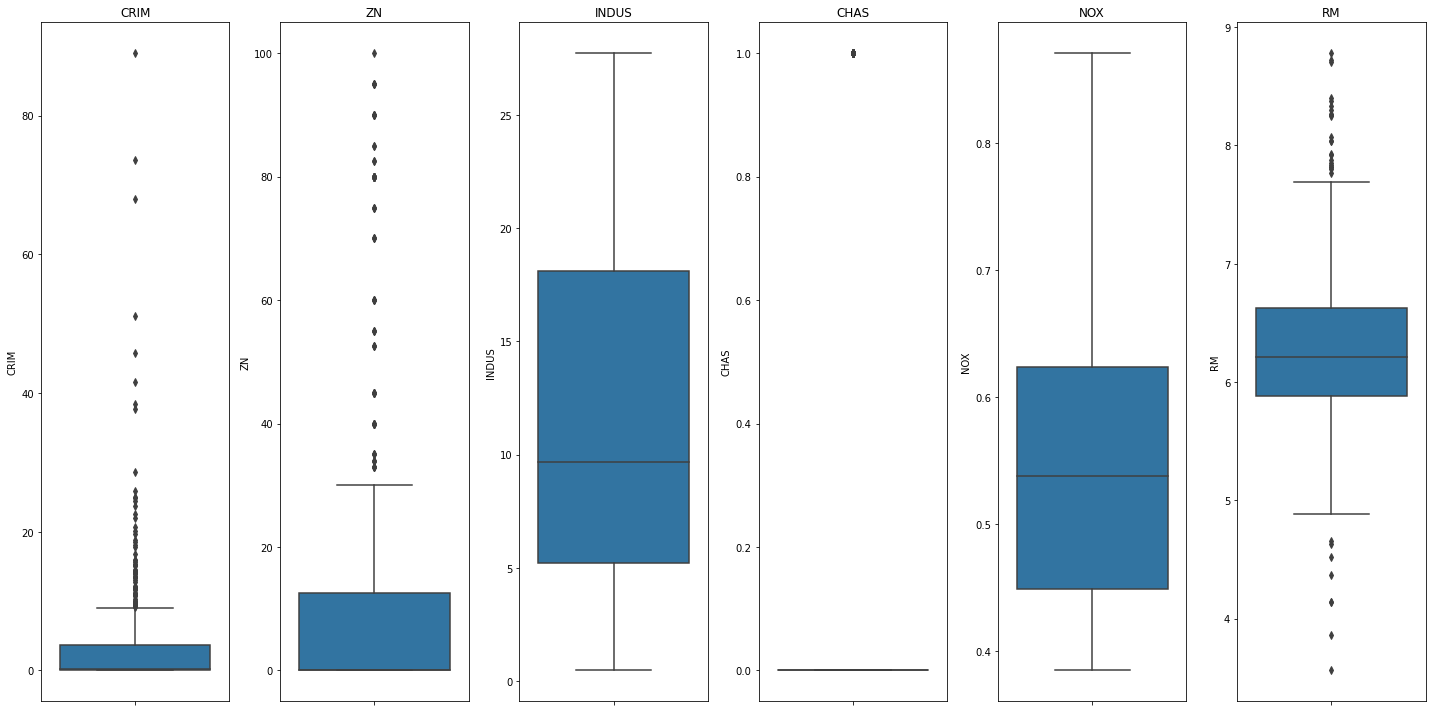

In [105]:
_, axes = plt.subplots(1, len(predictors)//2 , figsize=(20,10))
for i, predictor in enumerate(predictors[:len(predictors)//2]):
    sns.boxplot(y=boston[predictor], ax=axes[i])
    axes[i].set_title(predictor)
plt.tight_layout()

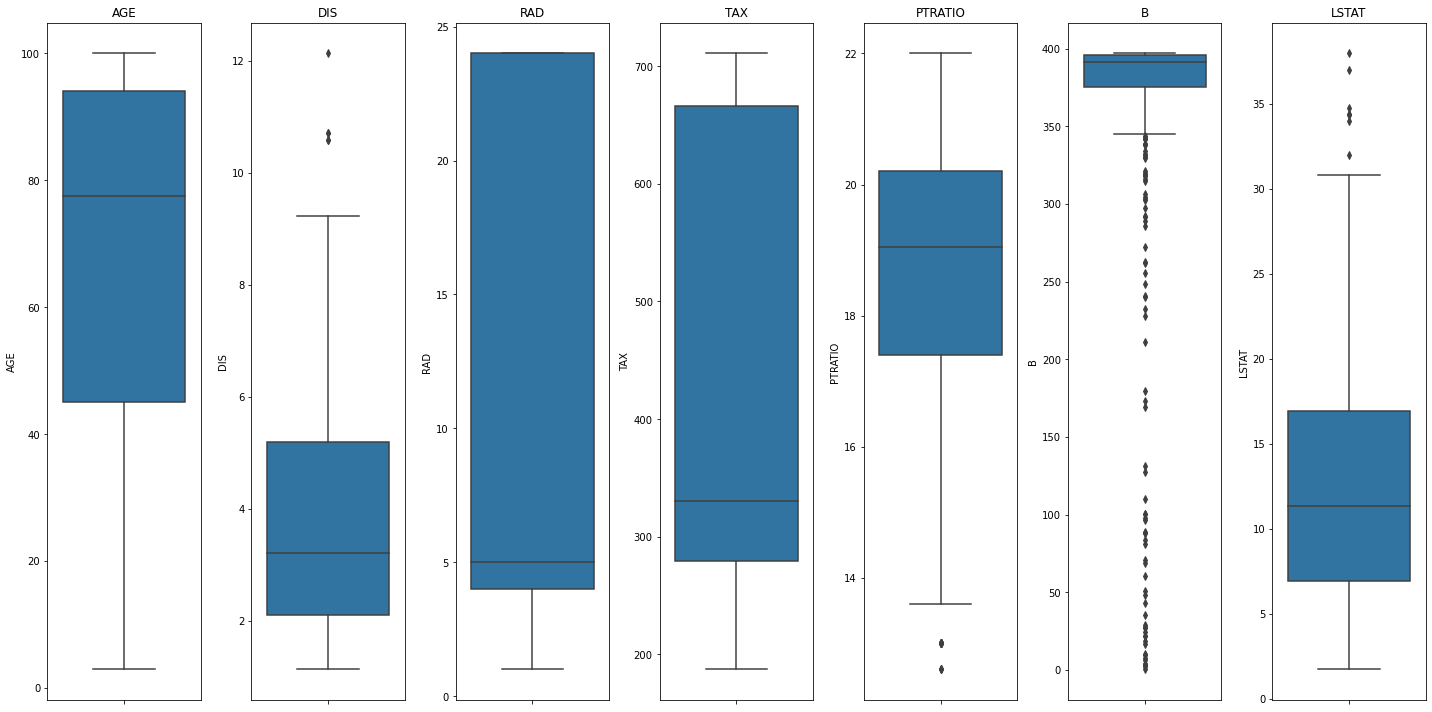

In [106]:
_, axes = plt.subplots(1, len(predictors)//2+1 , figsize=(20,10))
for i, predictor in enumerate(predictors[len(predictors)//2:]):
    sns.boxplot(y=boston[predictor], ax=axes[i])
    axes[i].set_title(predictor)
plt.tight_layout()

In [107]:
# So we can see the predictor values go over several orders of magnitude, so it probably makes sense to scale them. 
# Note: It is best practice to do this scaling, so you should **always** do it for linear regression.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# do not scale the categorical predictor
cols_without_chas = boston.drop(['CHAS'], axis='columns').columns.to_list()
boston_scaled = scaler.fit_transform(boston.drop(['CHAS'], axis='columns'))


boston_scaled_df = pd.DataFrame(boston_scaled, columns=cols_without_chas)
boston_scaled_df = pd.concat([boston_scaled_df, boston[['CHAS']]], axis='columns') # boston[['CHAS']] makes a pandas DataFrame instead of a series
predictors = boston_scaled_df.columns # reset predictors so that CHAS is at the end
predictors

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],
      dtype='object')

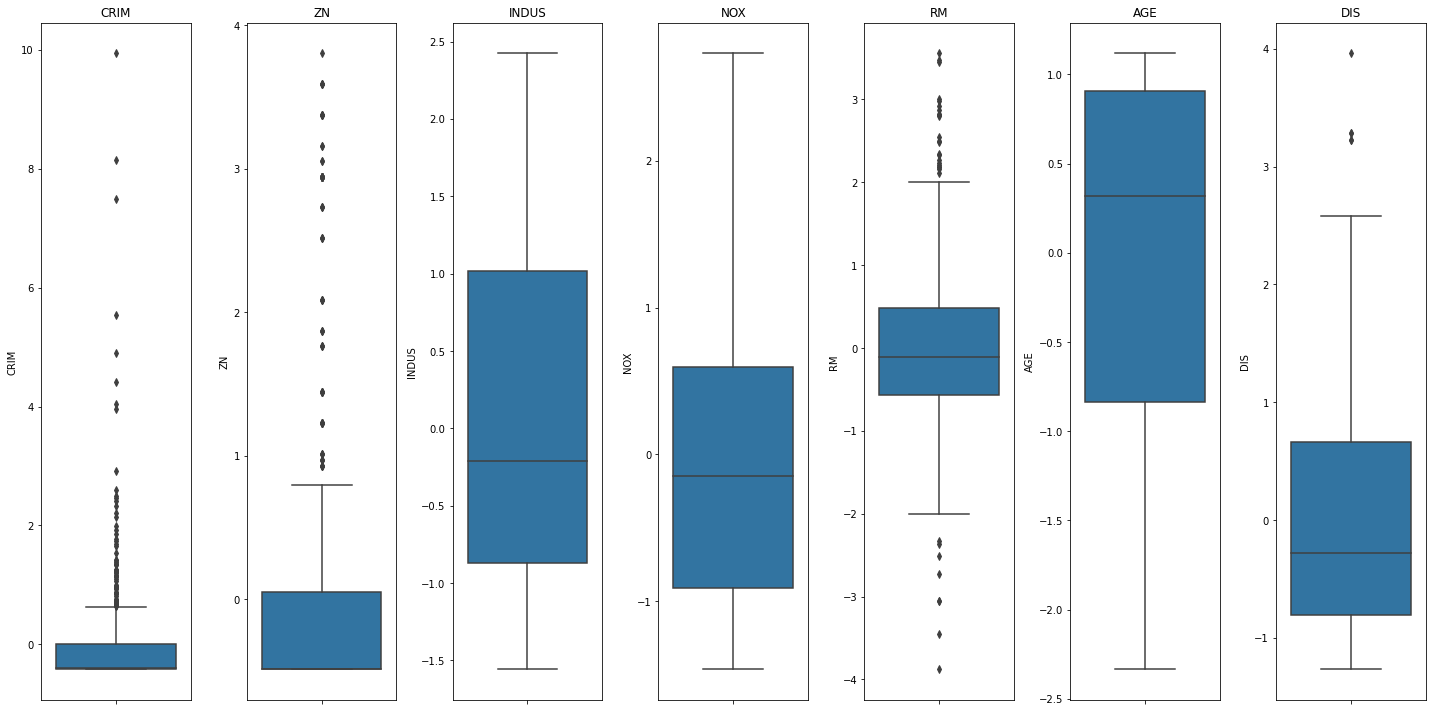

In [67]:
_, axes = plt.subplots(1, len(predictors)//2 , figsize=(20,10))
for i, predictor in enumerate(predictors[:len(predictors)//2]):
    sns.boxplot(y=boston_scaled_df[predictor], ax=axes[i])
    axes[i].set_title(predictor)
plt.tight_layout()

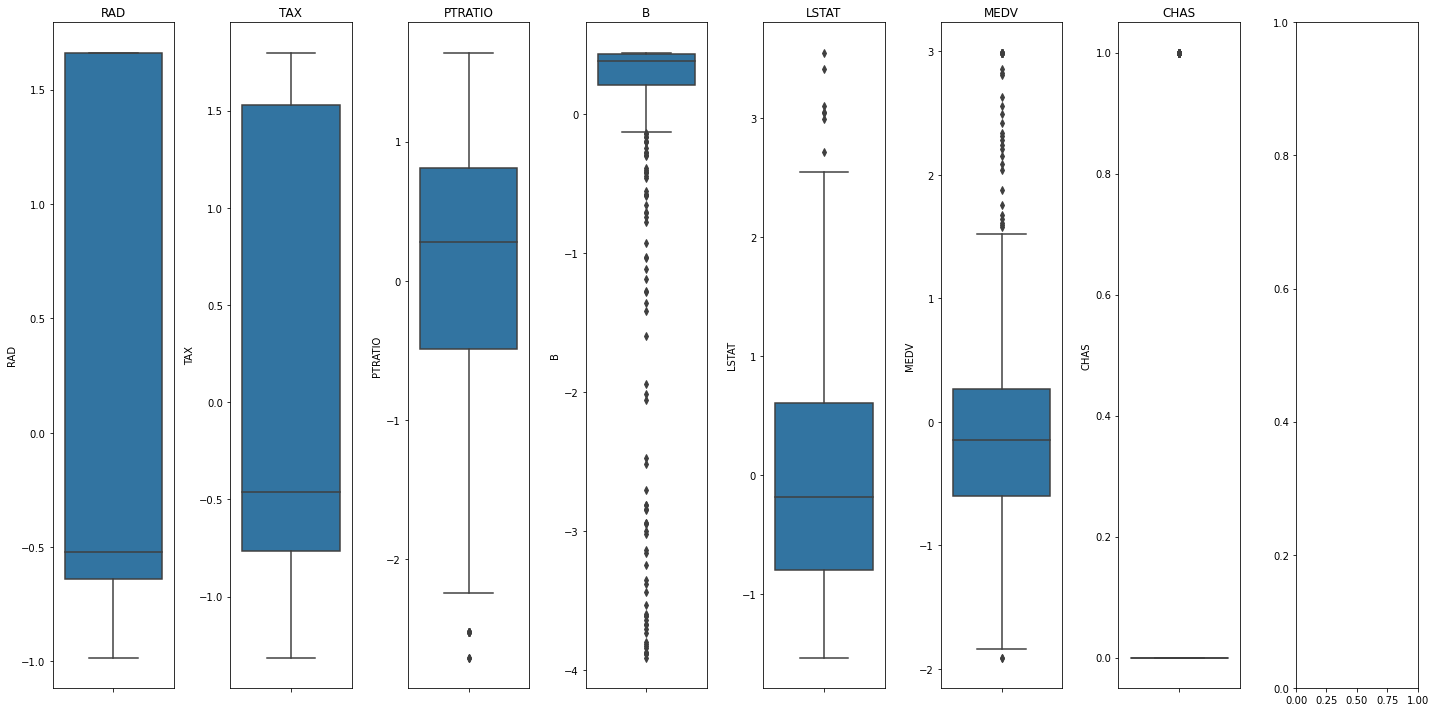

In [68]:
_, axes = plt.subplots(1, len(predictors)//2+1 , figsize=(20,10))
for i, predictor in enumerate(predictors[len(predictors)//2:]):
    sns.boxplot(y=boston_scaled_df[predictor], ax=axes[i])
    axes[i].set_title(predictor)
plt.tight_layout()

In [77]:
# Post scaling, everything is now mean = 0 and std = 1 
np.round(boston_scaled_df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,-0.00,1.00,-0.42,-0.41,-0.39,0.01,9.93
ZN,506.0,0.00,1.00,-0.49,-0.49,-0.49,0.05,3.80
INDUS,506.0,0.00,1.00,-1.56,-0.87,-0.21,1.02,2.42
NOX,506.0,-0.00,1.00,-1.47,-0.91,-0.14,0.60,2.73
RM,506.0,-0.00,1.00,-3.88,-0.57,-0.11,0.48,3.56
AGE,506.0,-0.00,1.00,-2.34,-0.84,0.32,0.91,1.12
DIS,506.0,-0.00,1.00,-1.27,-0.81,-0.28,0.66,3.96
RAD,506.0,-0.00,1.00,-0.98,-0.64,-0.52,1.66,1.66
TAX,506.0,0.00,1.00,-1.31,-0.77,-0.46,1.53,1.80
PTRATIO,506.0,-0.00,1.00,-2.71,-0.49,0.27,0.81,1.64


In [79]:
# Let's calculate the correlatoin matrix and make a heatmap
cor = boston_scaled_df.corr()
cor

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.055892
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.042697
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.062938
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.091203
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.091251
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.086518
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.099176
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.007368
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.035587
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787,-0.121515


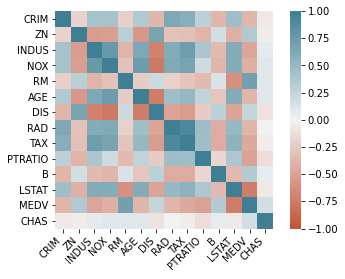

In [80]:
# Investigate the data
ax = sns.heatmap(cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [109]:
boston_scaled_df['MEDV'] = data.target #add the target to the dataframe

In [97]:
predictors

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS'],
      dtype='object')

In [96]:
# create the formula string
formula_1 = 'MEDV ~  + CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)'
model_1 = smf.ols(formula=formula_1, data=boston_scaled_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        22:08:35   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0202      0.024     -0.848      0.397      -0.067       0.027
CRIM          -0.1010      0.031     -3.287      0.001      -0.161      -0.041
ZN             0.1177      0.035      3.382      0.001       0.049       0.186
INDUS          0.0153      0.046      0.334      0.738      -0.075       0.105
NOX           -0.2238      0.048     -4.651      0.000      -0.318      -0.129
RM             0.2911      0.032      9.116      0.000       0.228       0.354
AGE            0.0021      0.040      0.052      0.958      -0.077       0.082
DIS           -0.3378      0.046     -7.398      0.000      -0.428      -0.248
RAD            0.2897      0.063      4.613      0.000       0.166       0.413
TAX           -0.2260      0.069     -3.280      0.001      -0.361      -0.091
PTRATIO       -0.2243      0.031     -7.283      0.000      -0.285      -0.164
B              0.0924      0.027      3.467      0.001       0.040       0.145
LSTAT         -0.4074      0.039    -10.347      0.000      -0.485      -0.330
CHAS           0.2924      0.094      3.118      0.002       0.108       0.477
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So if we look at the errors of this model, there are many coefficients that are not significant at the 10% level
### Let's remove them one at a time, from largest to smallest, to see how our model changes.

Note: We are only doing this so you can see how the different models behave. There are better procedures out there for selecting the optimal model than removing them one at a time to see what happens.

In [112]:
formula_2 = 'MEDV ~  + CRIM + ZN + INDUS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)' #removed age
model_2 = smf.ols(formula=formula_2, data=boston_scaled_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          6.08e-136
Time:                        22:30:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.3468      0.219    102.055      0.000      21.917      22.777
CRIM          -0.9281      0.282     -3.290      0.001      -1.482      -0.374
ZN             1.0795      0.317      3.404      0.001       0.456       1.703
INDUS          0.1409      0.421      0.335      0.738      -0.686       0.968
NOX           -2.0506      0.426     -4.814      0.000      -2.887      -1.214
RM             2.6774      0.287      9.338      0.000       2.114       3.241
DIS           -3.1104      0.401     -7.757      0.000      -3.898      -2.323
RAD            2.6599      0.575      4.627      0.000       1.530       3.789
TAX           -2.0758      0.632     -3.283      0.001      -3.318      -0.834
PTRATIO       -2.0594      0.282     -7.308      0.000      -2.613      -1.506
B              0.8501      0.244      3.481      0.001       0.370       1.330
LSTAT         -3.7372      0.340    -10.999      0.000      -4.405      -3.070
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
formula_3 = 'MEDV ~  + CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)' #removed INDUS
model_3 = smf.ols(formula=formula_3, data=boston_scaled_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          5.54e-137
Time:                        22:30:24   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.3448      0.219    102.178      0.000      21.915      22.774
CRIM          -0.9316      0.282     -3.307      0.001      -1.485      -0.378
ZN             1.0682      0.315      3.390      0.001       0.449       1.687
NOX           -2.0115      0.409     -4.915      0.000      -2.816      -1.207
RM             2.6684      0.285      9.356      0.000       2.108       3.229
DIS           -3.1401      0.391     -8.037      0.000      -3.908      -2.372
RAD            2.6062      0.552      4.726      0.000       1.523       3.690
TAX           -1.9831      0.568     -3.493      0.001      -3.099      -0.867
PTRATIO       -2.0471      0.279     -7.334      0.000      -2.596      -1.499
B              0.8474      0.244      3.475      0.001       0.368       1.327
LSTAT         -3.7279      0.338    -11.019      0.000      -4.393      -3.063
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So now we have 3 models. Let's do a train-test split and get a better since of our error metrics on unseen data

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score